In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [1]:
import prepare

# Store Data 

## Acquire

In [2]:
from prepare import prep_sales

In [3]:
df = prep_sales()

In [4]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day_of_week    913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(8), obj

In [6]:
df.shape

(913000, 16)

## Data Splitting

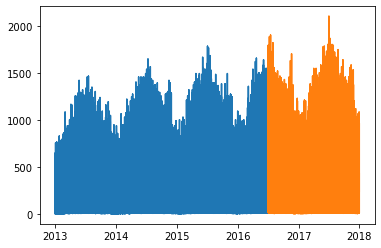

In [10]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## Visualizations

In [11]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

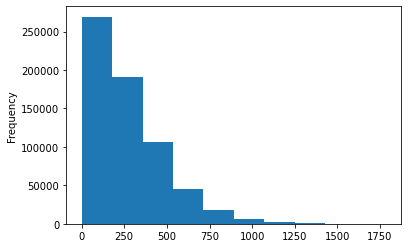

In [12]:
y.plot.hist()

## dont consider the time series

[Text(0.5, 1.0, 'Average Sales Totals by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales Total')]

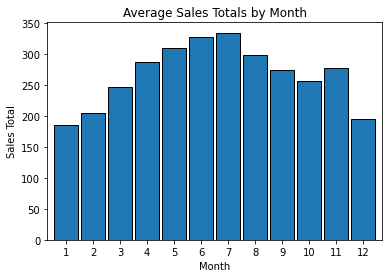

In [13]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Totals by Month', xlabel='Month', ylabel='Sales Total')

[Text(0.5, 1.0, 'Average Sales Total by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Sales Total')]

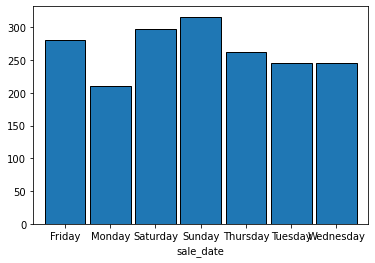

In [14]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Weekday', xlabel='Weekday', ylabel='Sales Total')

### Visualize Over Time 

<AxesSubplot:xlabel='sale_date'>

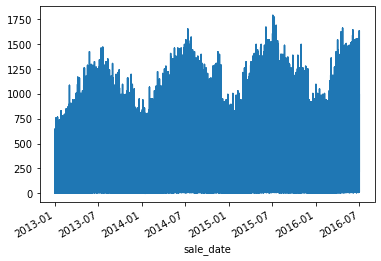

In [16]:
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

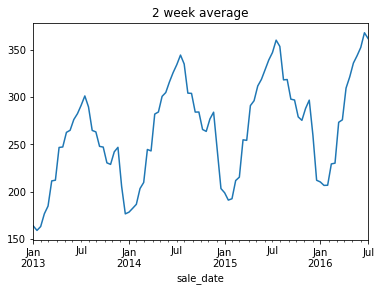

In [18]:
y.resample('2W').mean().plot(title='2 week average')

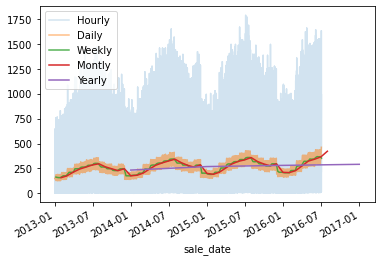

In [19]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

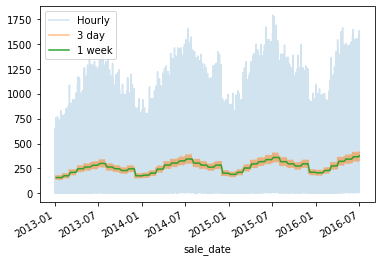

In [20]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize Changes Over Time 

<AxesSubplot:title={'center':'Average week-to-week change in Sales Totals'}, xlabel='sale_date'>

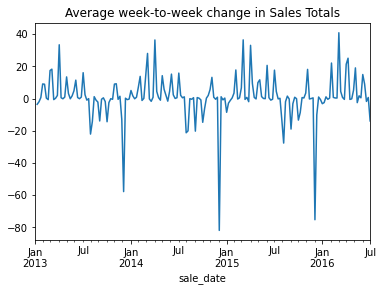

In [22]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Sales Totals')

# .diff can be used as an aggregate to measure difference 

<AxesSubplot:title={'center':'Average month-to-month change in Sales Totals'}, xlabel='sale_date'>

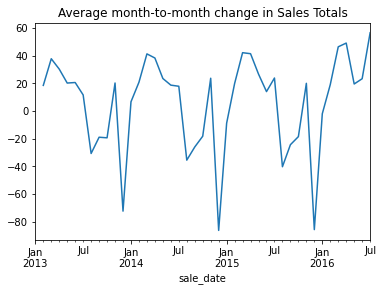

In [23]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Sales Totals')

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

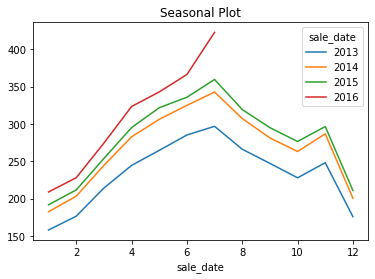

In [24]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

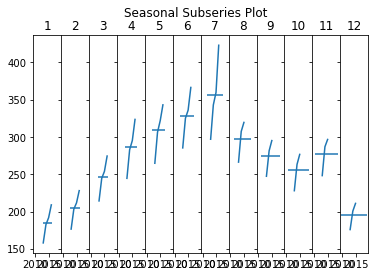

In [25]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## each subplot is the change of temperature of each individual month across all years observed 

## the line across the middle being the mean

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

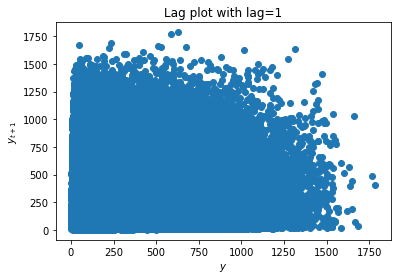

In [27]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

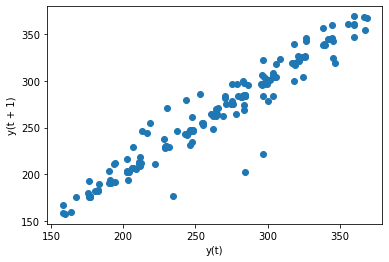

In [31]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 6)'>

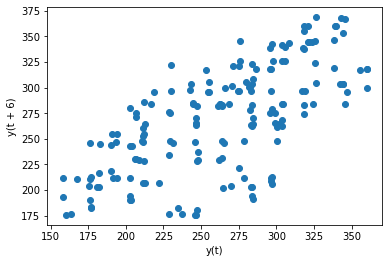

In [32]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=6)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

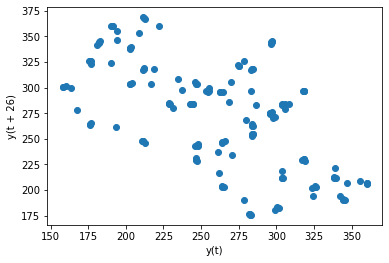

In [33]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

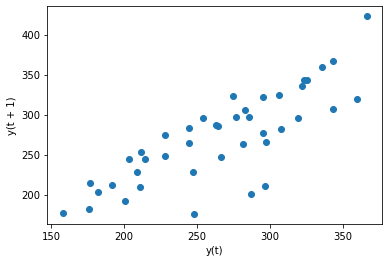

In [34]:
pd.plotting.lag_plot(train.sales_total.resample('M').mean(), lag=1)

### Autocorrelating Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

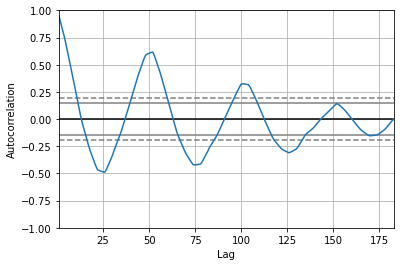

In [36]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

### Seasonal Decomposition

In [37]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.817427,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-76.420498,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-77.661680,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-77.653889,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

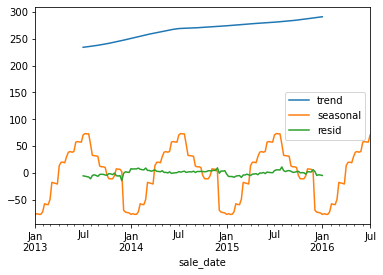

In [38]:
decomposition.iloc[:, 1:].plot()

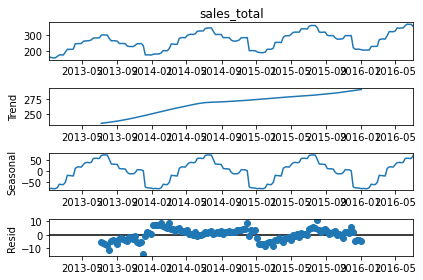

In [39]:
result.plot()
None

### Categories Over Time 

In [41]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 4, labels=['low', 'medium-low', 'medium-high', 'high'])
train.groupby('sales_bin').mean()

,item_id,sale_amount,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sales_bin,,,,,,,,,,,
low,25.500000,34.540319,456067.453125,5.500000,78224.80000,5.160400,2.384688e+11,2.384688e+11,4.853125,1.981250,185.710626
medium-low,25.500000,44.853594,456181.393750,5.500000,78224.80000,5.160400,2.384688e+11,2.384688e+11,6.212500,2.500000,241.133103
medium-high,25.500000,53.255931,456247.166144,5.500000,78224.80000,5.160400,2.384688e+11,2.384688e+11,6.758621,3.065831,286.350385
high,25.499094,65.108963,456396.586062,5.500594,78224.81075,5.161044,2.384485e+11,2.384485e+11,6.562500,4.453125,350.119046


Text(0, 0.5, '% of days in the month')

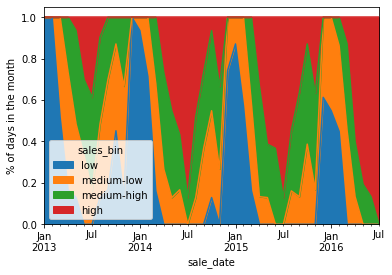

In [42]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

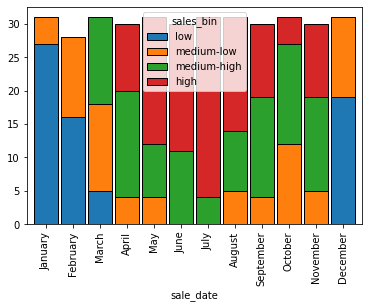

In [44]:
ax = (train['2015']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

### strftime

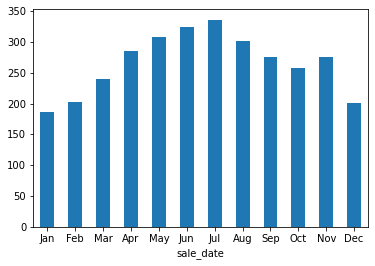

In [45]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

### Matplotlib Dates

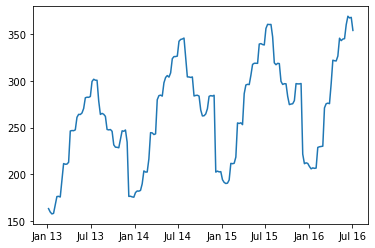

In [46]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

# Germany Power Data

## Acquire 

In [47]:
from prepare import prep_power

In [48]:
df = prep_power()

In [49]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [50]:
df.shape

(4383, 6)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   int64  
 5   year            4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


## Data Splitting

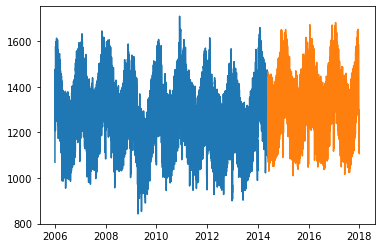

In [52]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

## Visulalizations 

In [54]:
y = train.consumption
y.head()

date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

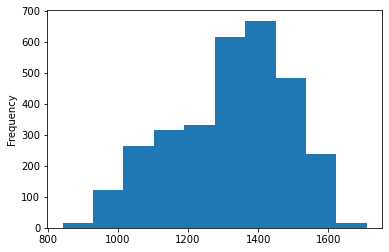

In [55]:
y.plot.hist()

## Dont consider the time series 

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

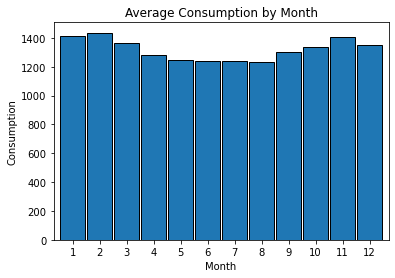

In [56]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

[Text(0.5, 1.0, 'Average Consumption by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Consumption')]

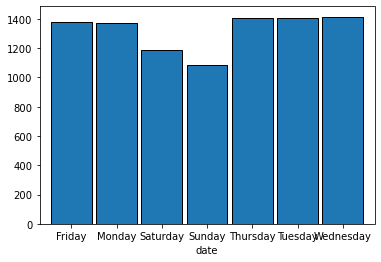

In [57]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')

### Visualize the Target Over Time

<AxesSubplot:xlabel='date'>

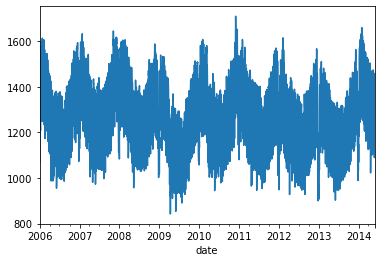

In [60]:
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

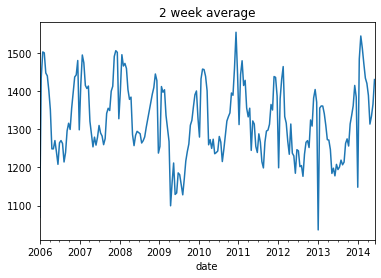

In [62]:
y.resample('2W').mean().plot(title='2 week average')

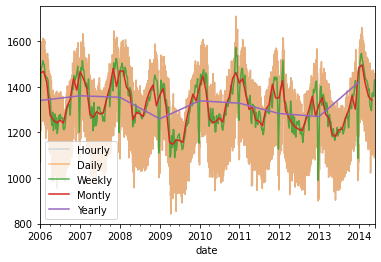

In [63]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

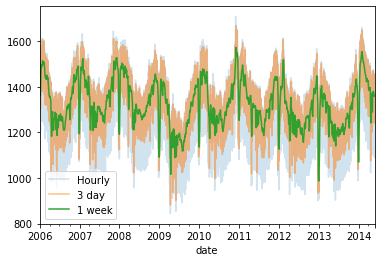

In [64]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in Consumption'}, xlabel='date'>

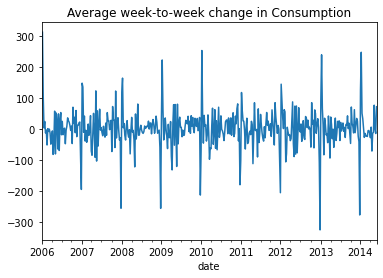

In [66]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Consumption')

# .diff can be used as an aggregate to measure difference 

<AxesSubplot:title={'center':'Average month-to-month change in Consumption'}, xlabel='date'>

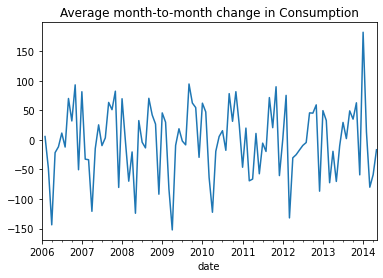

In [67]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Consumption')

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

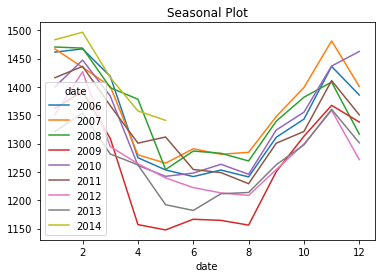

In [68]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

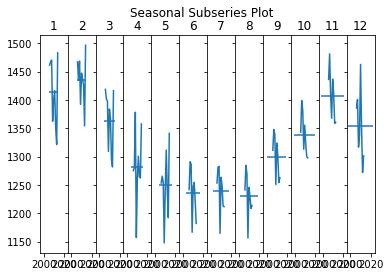

In [69]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

## each subplot is the change of temperature of each individual month across all years observed 

## the line across the middle being the mean

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

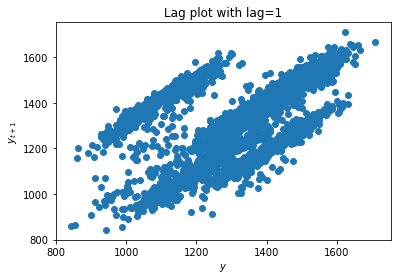

In [70]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

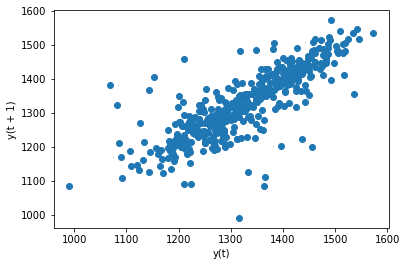

In [71]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

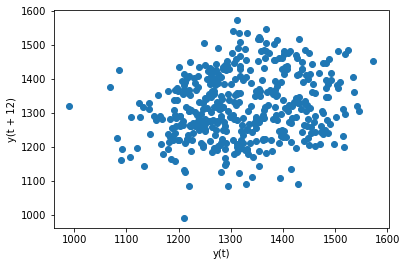

In [72]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=12)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

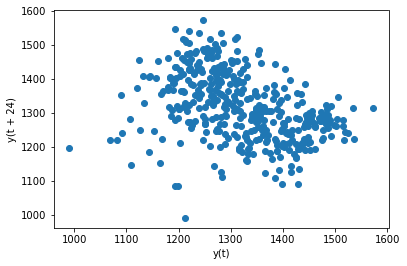

In [73]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

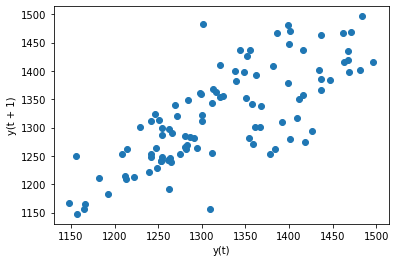

In [74]:
pd.plotting.lag_plot(train.consumption.resample('M').mean(), lag=1)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

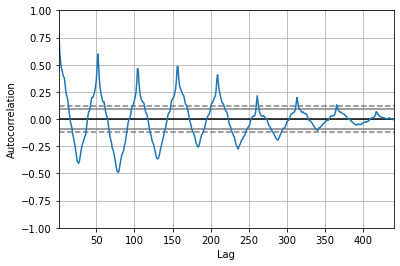

In [76]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

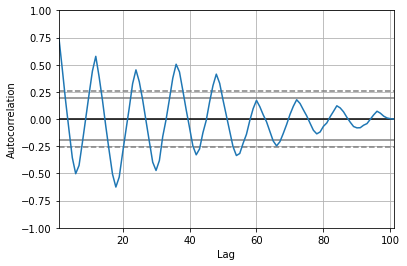

In [77]:
pd.plotting.autocorrelation_plot(train.consumption.resample('M').mean())